# The Adult dataset
The information is a replica of the notes for the abalone dataset from the UCI repository.

# 1. Title of Database: adult

# 2. Sources:
(a) Original owners of database (name/phone/snail address/email address) US Census Bureau. (b) Donor of database (name/phone/snail address/email address) Ronny Kohavi and Barry Becker, Data Mining and Visualization Silicon Graphics. e-mail: ronnyk@sgi.com (c) Date received (databases may change over time without name change!) 05/19/96

# 3. Past Usage:
(a) Complete reference of article where it was described/used @inproceedings{kohavi-nbtree, author={Ron Kohavi}, title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid}, booktitle={Proceedings of the Second International Conference on Knowledge Discovery and Data Mining}, year = 1996, pages={to appear}} (b) Indication of what attribute(s) were being predicted Salary greater or less than 50,000. (b) Indication of study's results (i.e. Is it a good domain to use?) Hard domain with a nice number of records. The following results obtained using MLC++ with default settings for the algorithms mentioned below.

# 4. Relevant Information Paragraph:
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

# 5. Number of Instances:
48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

# 6. Number of Attributes:
6 continuous, 8 nominal attributes.

# 7. Attribute Information:
age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

class: >50K, <=50K

# 8. Missing Attribute Values:
7% have missing values.

# 9. Class Distribution:
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)

Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

# 10. Notes for Delve
One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.

Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only

uses cases with no missing values.

The income prototask comes with two priors, differing according to if attribute 4 (education) is considered to be nominal or ordinal.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
missing_val = ['n/a', '?', '-']
Dat_fr = pd.read_csv('adult.csv', na_values = missing_val)

In [12]:
Dat_fr.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [13]:
Dat_fr.shape

(48842, 15)

In [14]:
Dat_fr.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [29]:
total_rows = len(Dat_fr)
del_rows = Dat_fr.isnull().any(axis = 1).sum()
print(total_rows, del_rows)


48842 3620


In [30]:
Dat_fr.isnull().any(axis = 1)

0        False
1        False
2        False
3        False
4         True
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [34]:
Dat_fr.dropna(axis = 0, how = 'any', inplace = True)
Dat_fr.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [33]:
current_rows = len(Dat_fr)
print(current_rows)

45222


In [19]:
print('Percentage of deleted number of rows:',100*(del_rows/total_rows),'%')

Percentage of deleted number of rows: 7.411653904426519 %


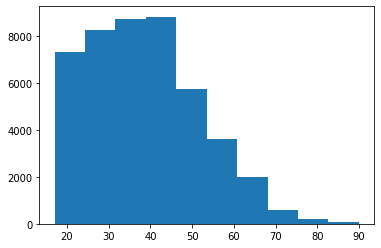

In [35]:
plt.hist(Dat_fr['age'])
plt.show()

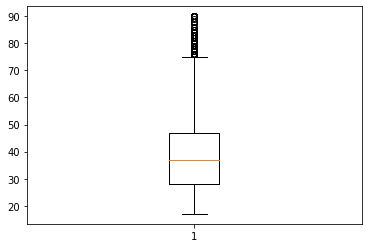

In [21]:
plt.boxplot(Dat_fr['age'])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]),
 <a list of 74 Text xticklabel objects>)

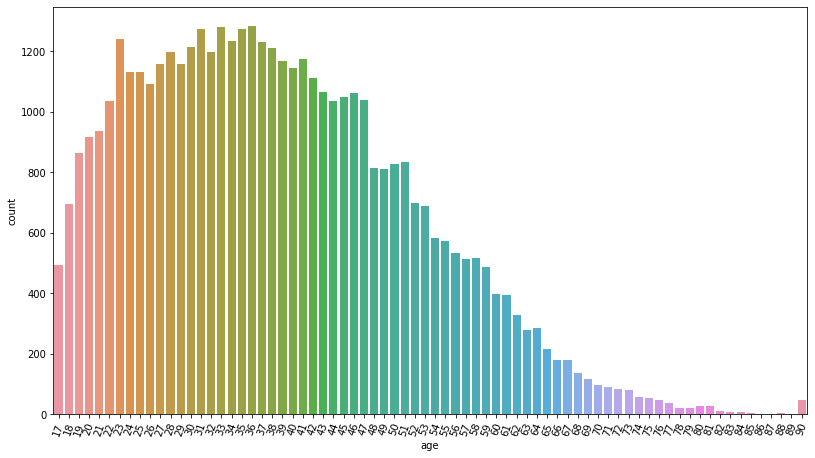

In [36]:
plt.figure(figsize = (13.5,7.5))
sns.countplot(Dat_fr['age'])
plt.xticks(rotation = 70)

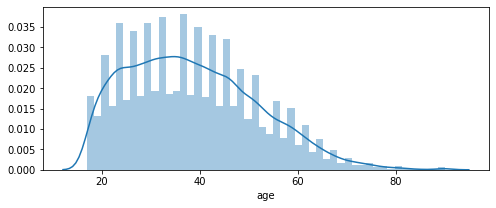

In [38]:
plt.figure(figsize = (8, 3))
sns.distplot(Dat_fr['age'], hist = True, rug = False)

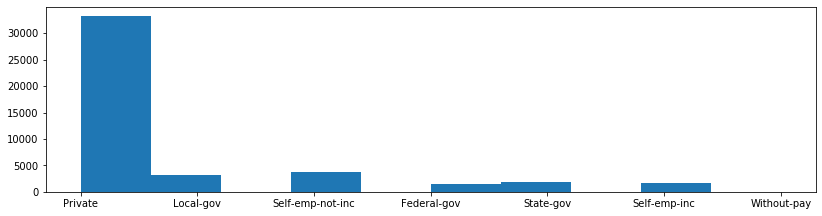

In [39]:
plt.figure(figsize = (13.8, 3.4))
plt.hist(Dat_fr['workclass'])
plt.show()

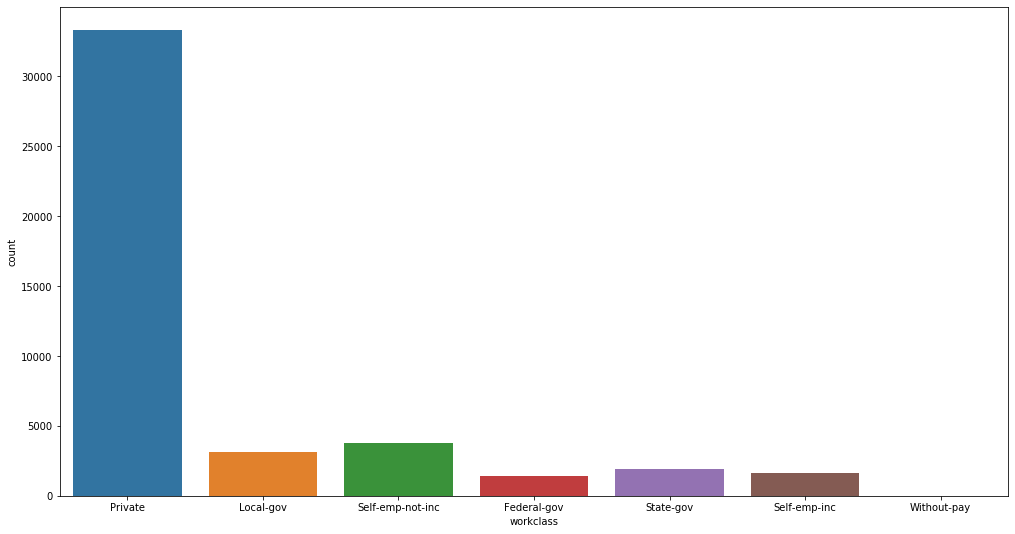

In [40]:
plt.figure(figsize = (17, 9))
sns.countplot(Dat_fr['workclass'])

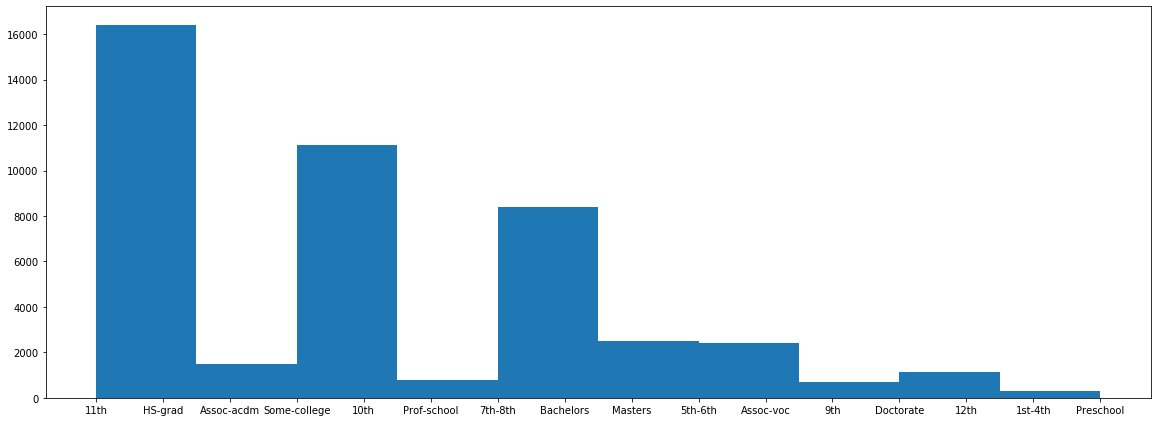

In [42]:
plt.figure(figsize = (19.8, 7.2))
plt.hist(Dat_fr['education'])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

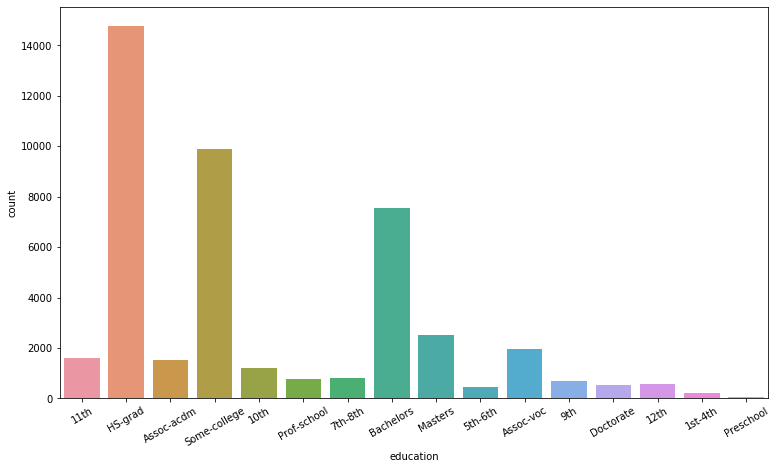

In [45]:
plt.figure(figsize = (12.7,7.2))
sns.countplot(Dat_fr['education'])
plt.xticks(rotation = 30)

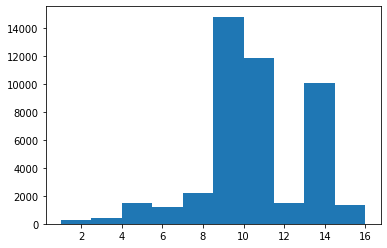

In [46]:
plt.hist(Dat_fr['educational-num'])
plt.show()


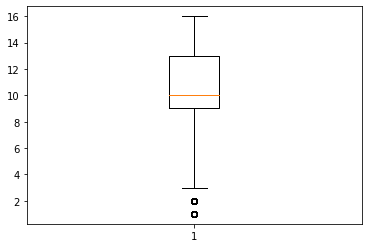

In [47]:
plt.boxplot(Dat_fr['educational-num'])
plt.show()

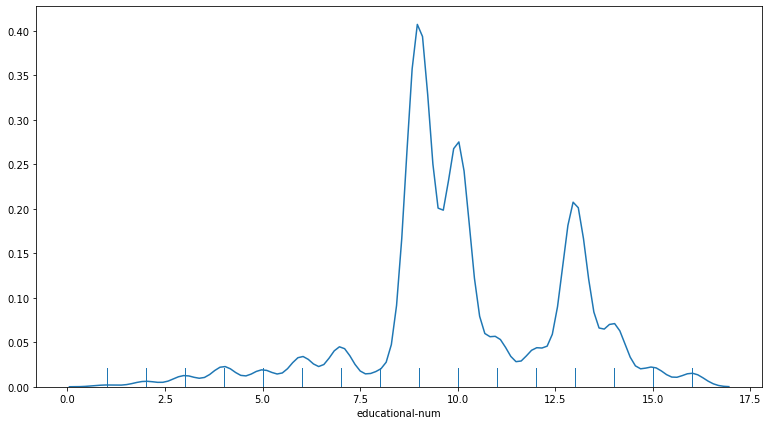

In [56]:
plt.figure(figsize = (13, 7))
sns.distplot(Dat_fr['educational-num'], hist = False, rug = True)

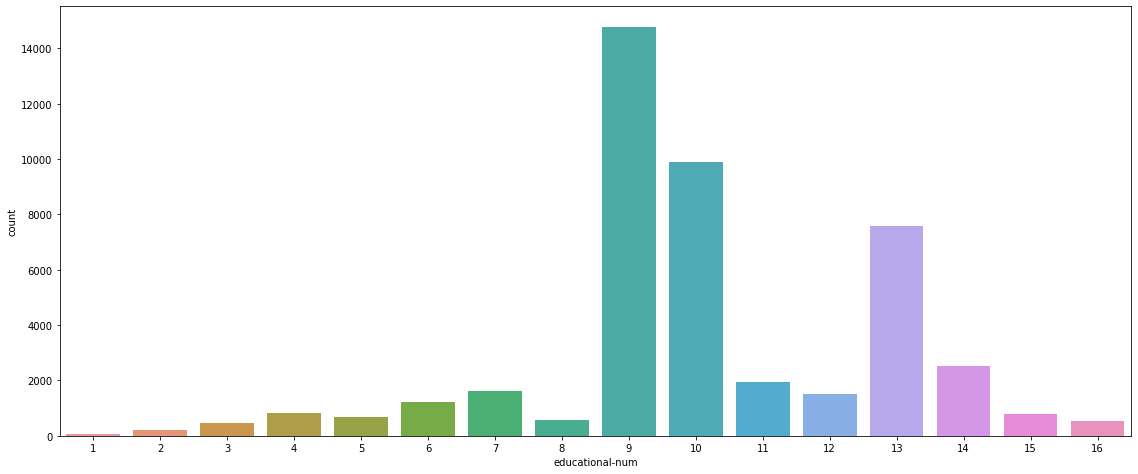

In [57]:
plt.figure(figsize = (19.2,7.9))
sns.countplot(Dat_fr['educational-num'])

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

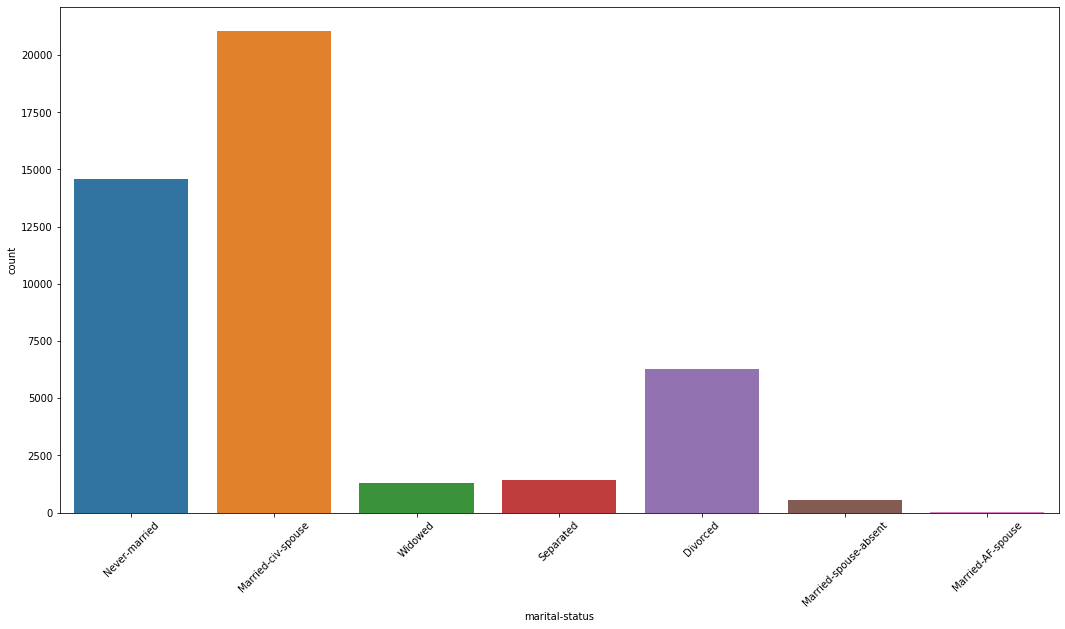

In [62]:
plt.figure(figsize = (17.9,9.3))
sns.countplot(Dat_fr['marital-status'])
plt.xticks(rotation = 45)


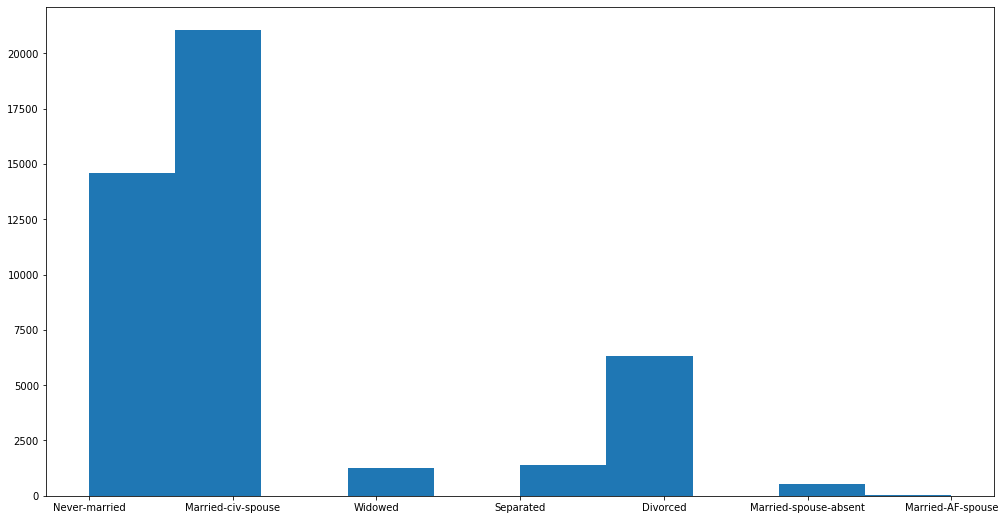

In [61]:
plt.figure(figsize = (17, 9))
plt.hist(Dat_fr['marital-status'])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

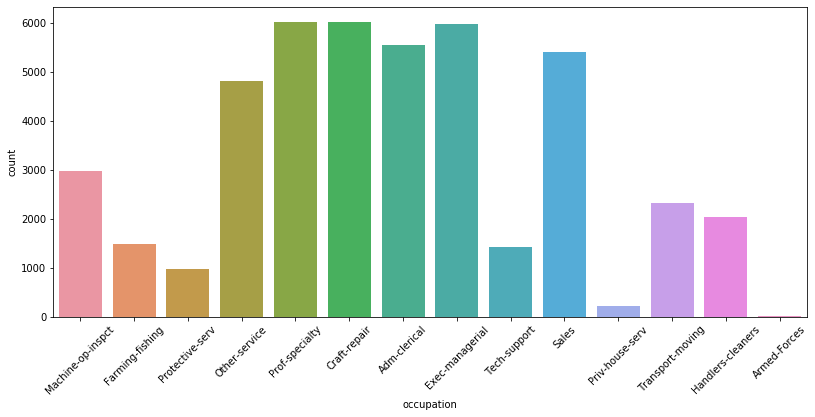

In [65]:
plt.figure(figsize = (13.5,5.7))
sns.countplot(Dat_fr['occupation'])
plt.xticks(rotation = 45)

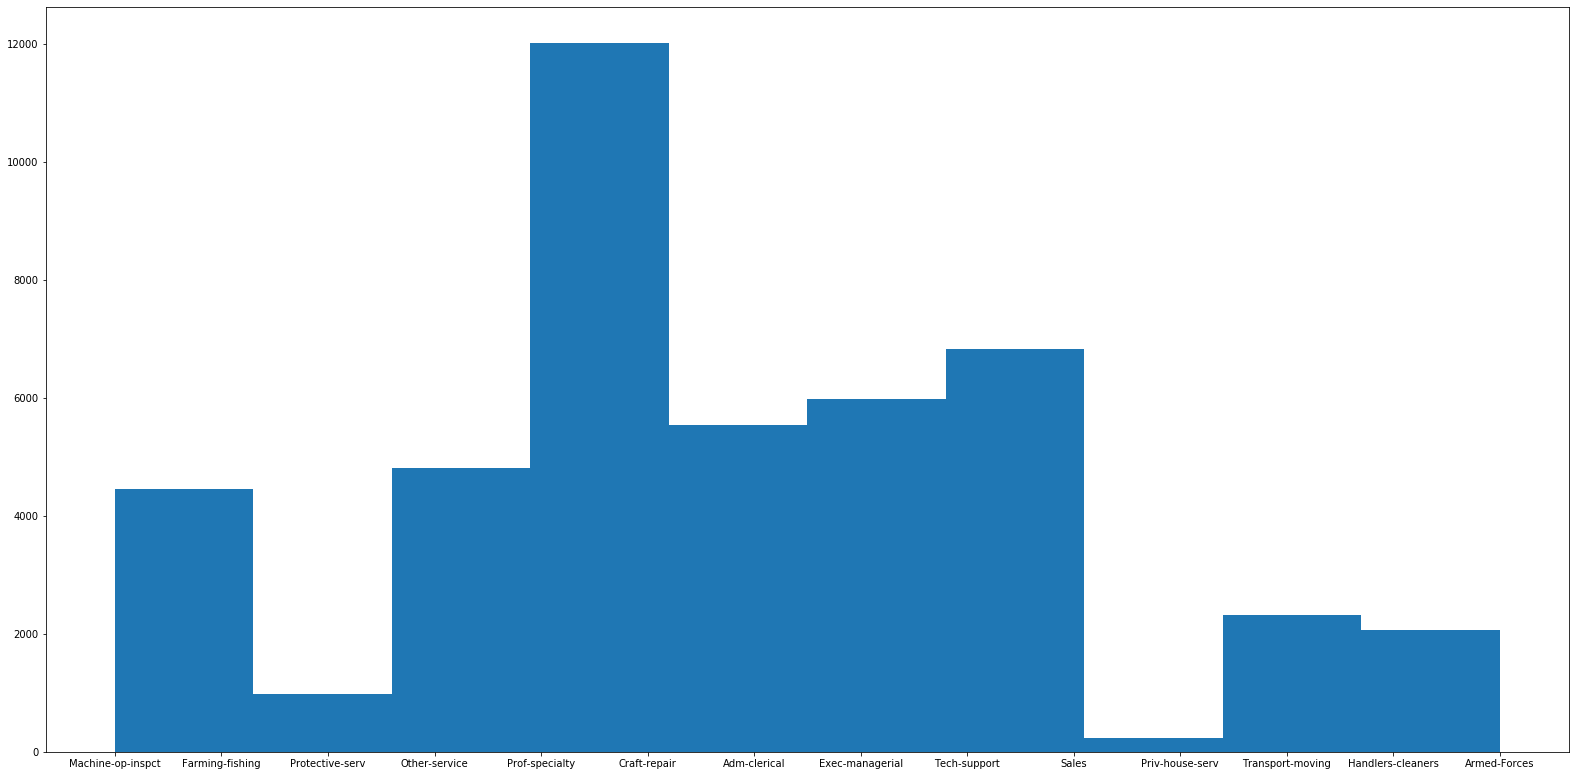

In [68]:
plt.figure(figsize = (27.3,13.7))
plt.hist(Dat_fr['occupation'])
plt.show()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

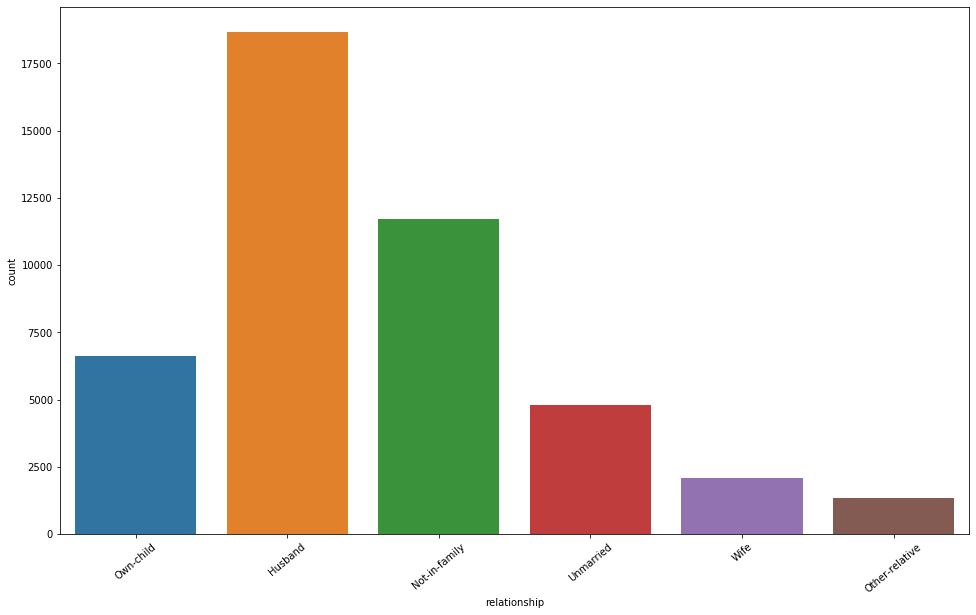

In [72]:
plt.figure(figsize = (16.3,9.7))
sns.countplot(Dat_fr['relationship'])
plt.xticks(rotation = 40)

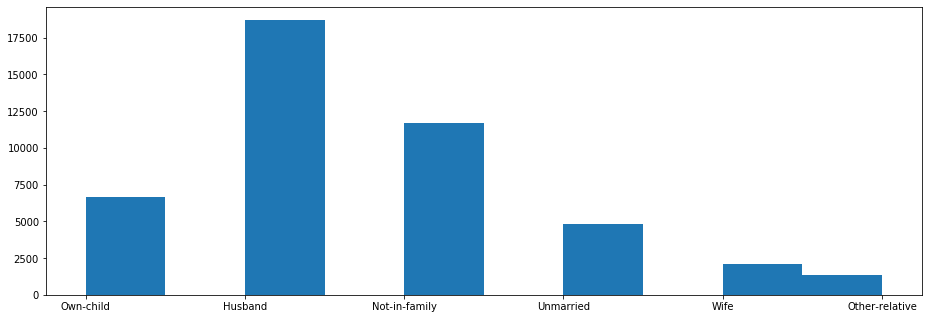

In [73]:
plt.figure(figsize = (15.7,5.3))
plt.hist(Dat_fr['relationship'])
plt.show()

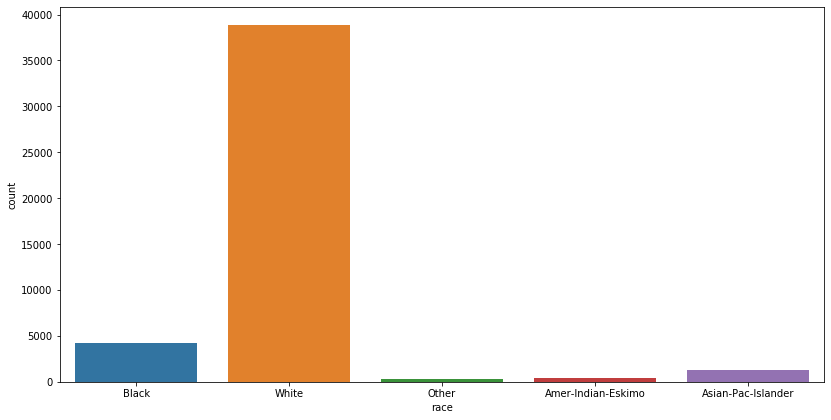

In [81]:
plt.figure(figsize = (13.7,6.9))
sns.countplot(Dat_fr['race'])

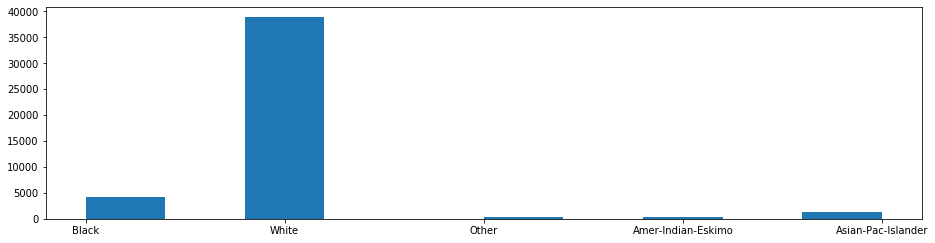

In [82]:
plt.figure(figsize = (15.7,3.9))
plt.hist(Dat_fr['race'])
plt.show()


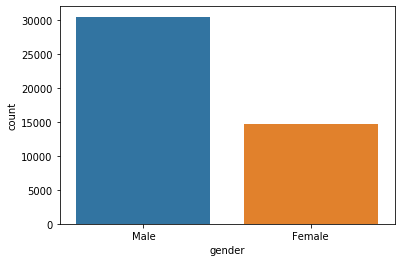

In [79]:
sns.countplot(Dat_fr['gender'])

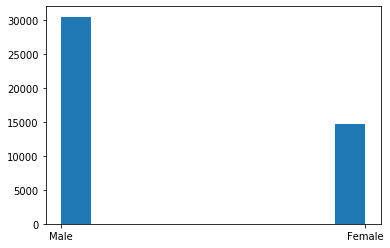

In [78]:
plt.hist(Dat_fr['gender'])
plt.show()

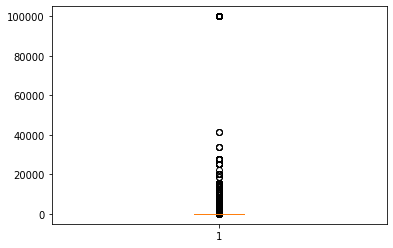

In [83]:
plt.boxplot(Dat_fr['capital-gain'])
plt.show()

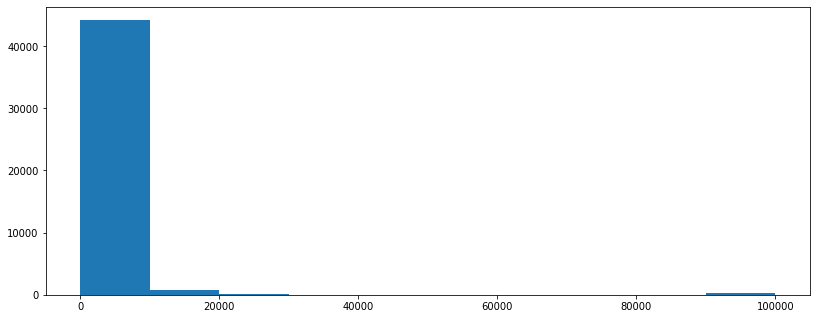

In [84]:
plt.figure(figsize = (13.7,5.3))
plt.hist(Dat_fr['capital-gain'])
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

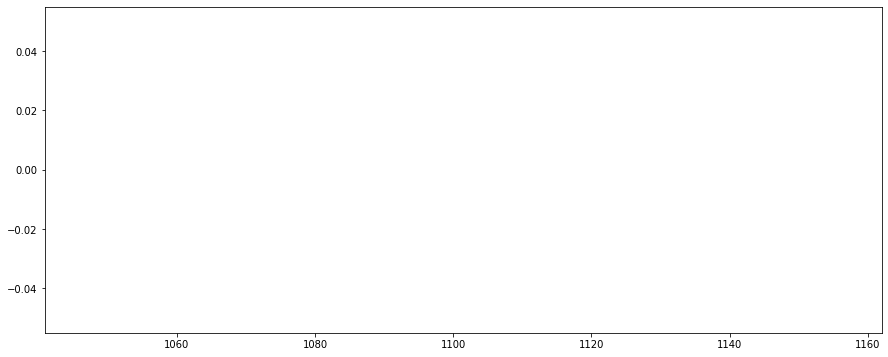

In [156]:
plt.figure(figsize = (15, 6))
sns.distplot(Dat_fr['capital-gain'], hist = False, rug = True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120]),
 <a list of 121 Text xticklabel objects>)

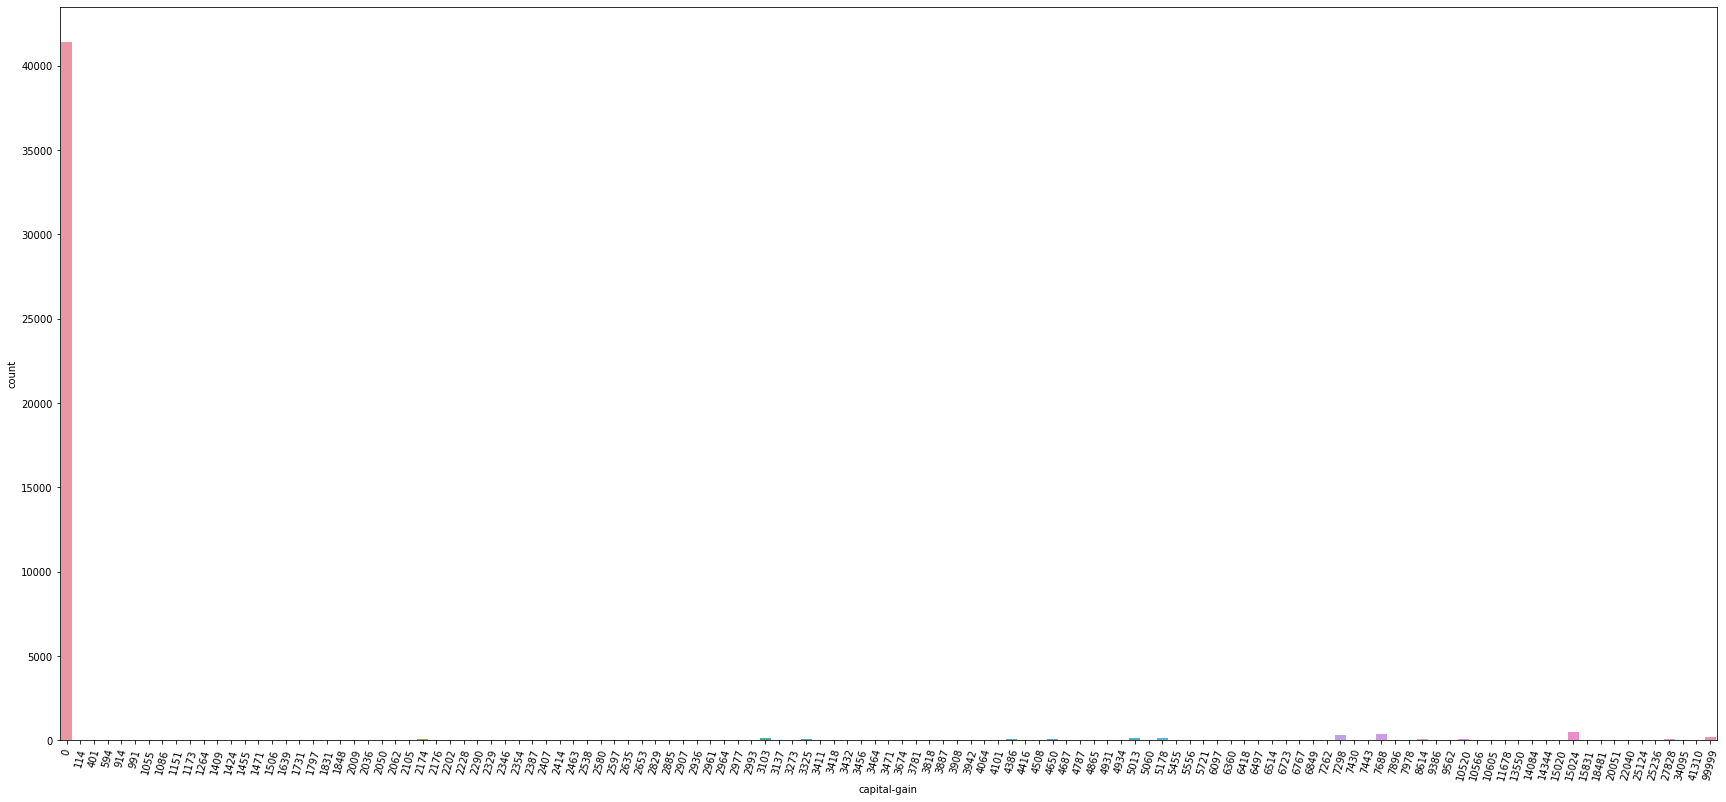

In [91]:
plt.figure(figsize = (29.7,13.5))
sns.countplot(Dat_fr['capital-gain'])
plt.xticks(rotation = 75)

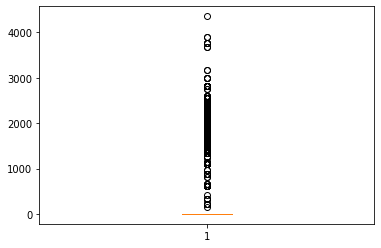

In [93]:
plt.boxplot(Dat_fr['capital-loss'])
plt.show()

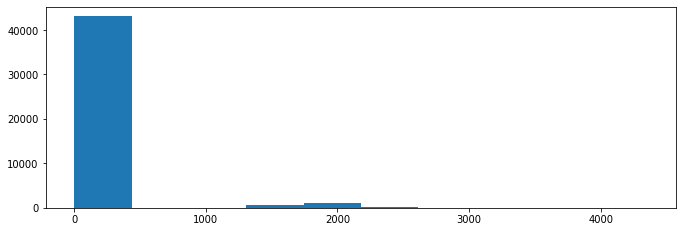

In [98]:
plt.figure(figsize = (11.3,3.7))
plt.hist(Dat_fr['capital-loss'])
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

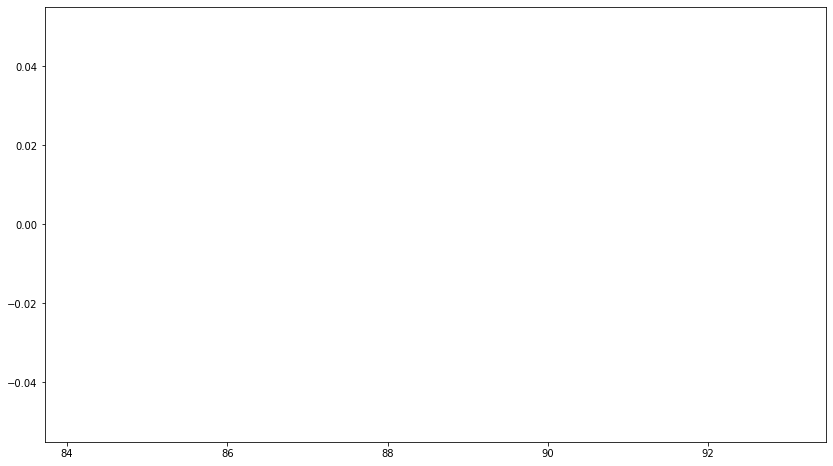

In [157]:
plt.figure(figsize = (14, 8))
sns.distplot(Dat_fr['capital-loss'], hist = False, rug = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 <a list of 97 Text xticklabel objects>)

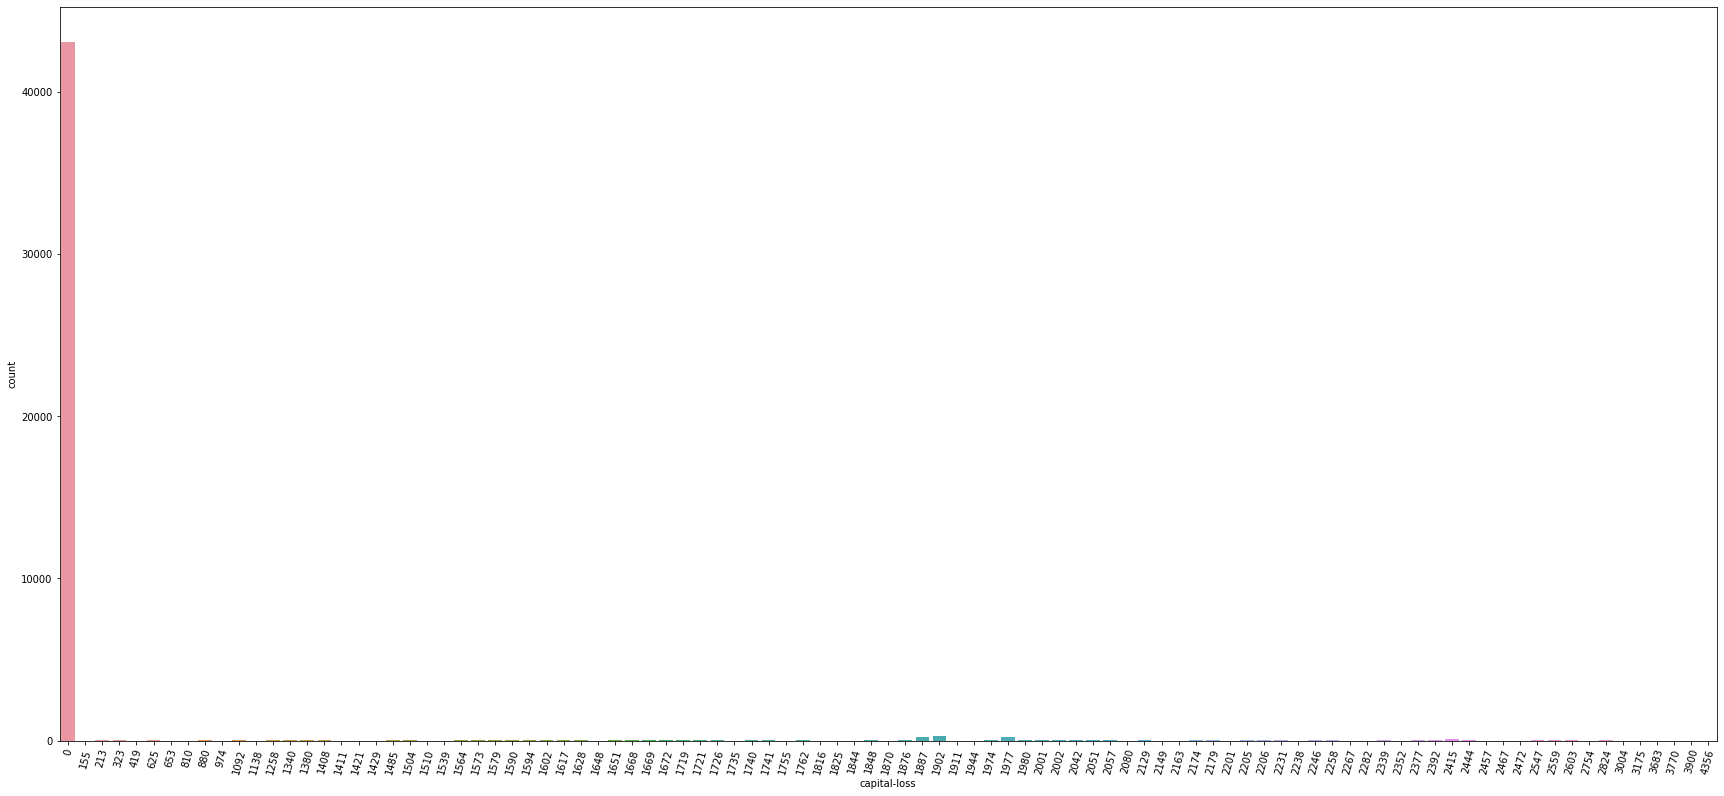

In [96]:
plt.figure(figsize = (29.7,13.5))
sns.countplot(Dat_fr['capital-loss'])
plt.xticks(rotation = 75)

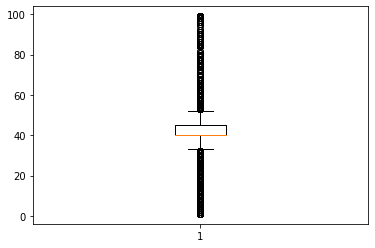

In [99]:
plt.boxplot(Dat_fr['hours-per-week'])
plt.show()

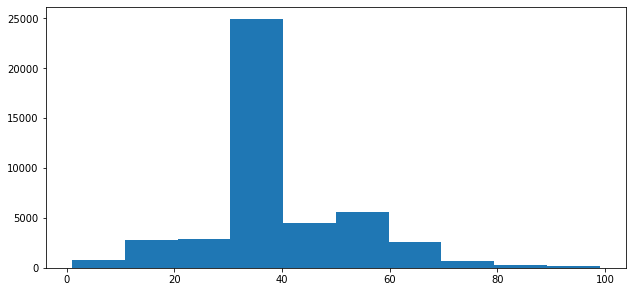

In [100]:
plt.figure(figsize = (10.4,4.8))
plt.hist(Dat_fr['hours-per-week'])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <a list of 96 Text xticklabel objects>)

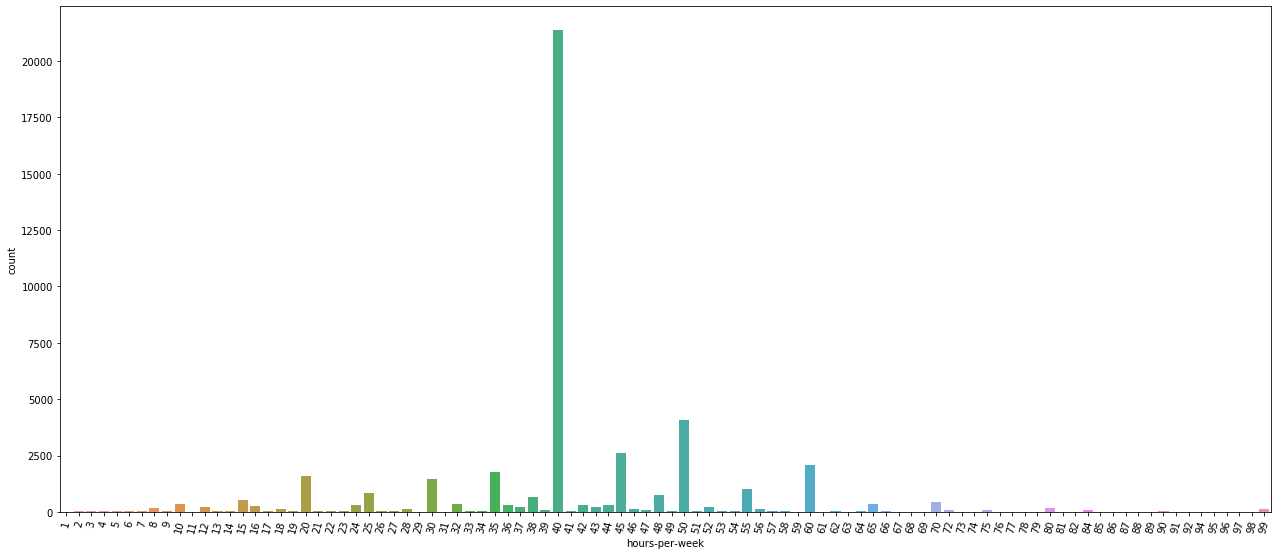

In [101]:
plt.figure(figsize = (21.7,9.3))
sns.countplot(Dat_fr['hours-per-week'])
plt.xticks(rotation = 75)

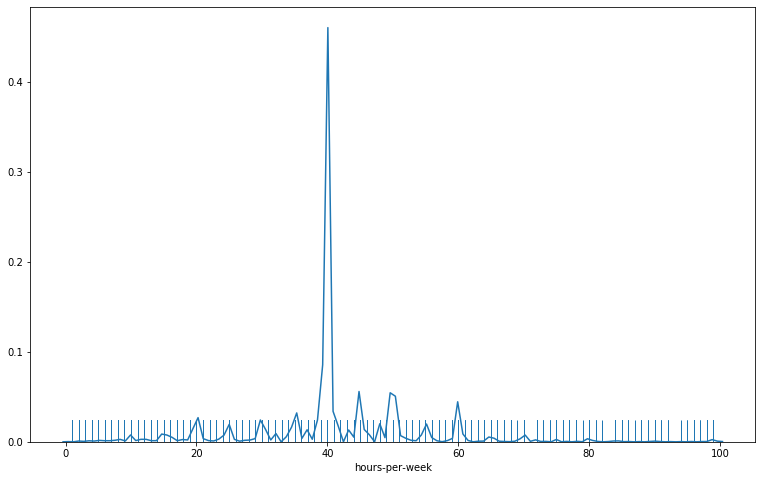

In [103]:
plt.figure(figsize = (13, 8))
sns.distplot(Dat_fr['hours-per-week'], hist = False, rug = True)

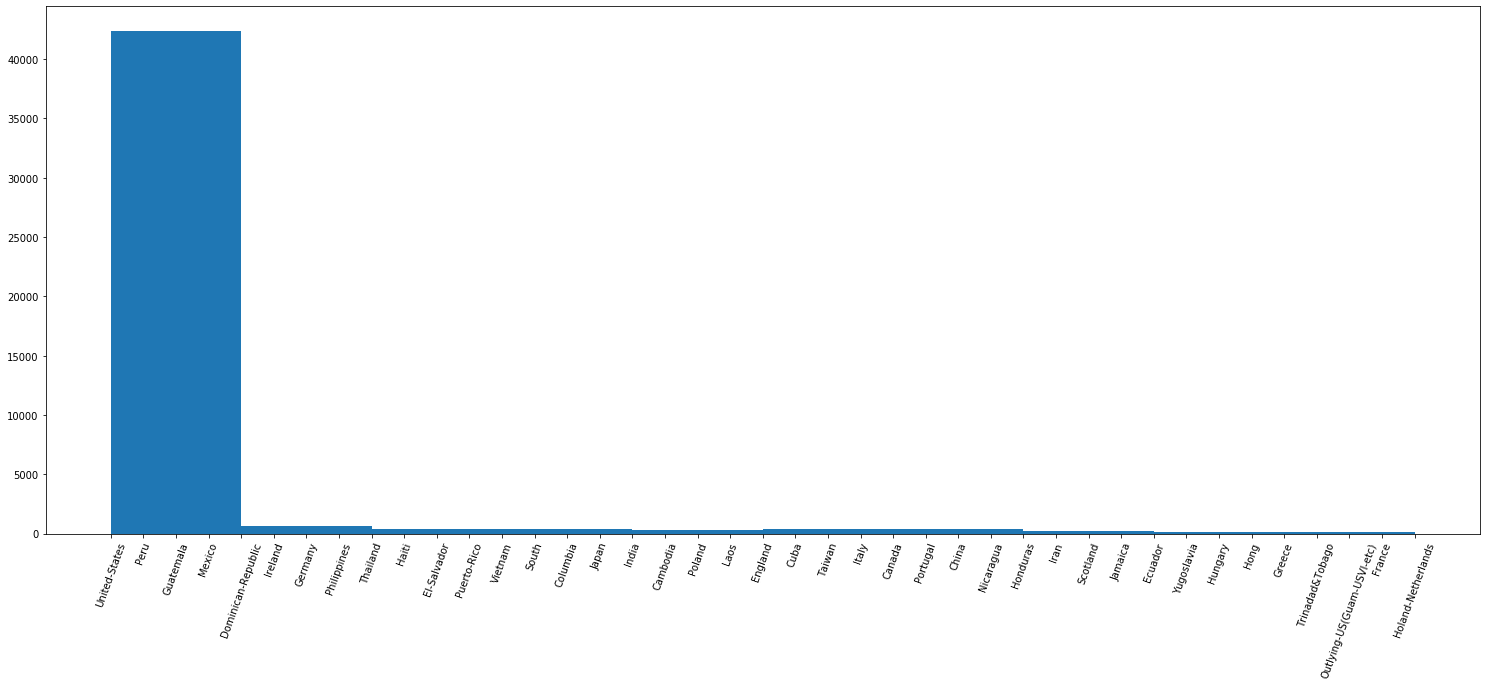

In [130]:
plt.figure(figsize = (25.7,9.7))
plt.hist(Dat_fr['native-country'])
plt.xticks(rotation = 70)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

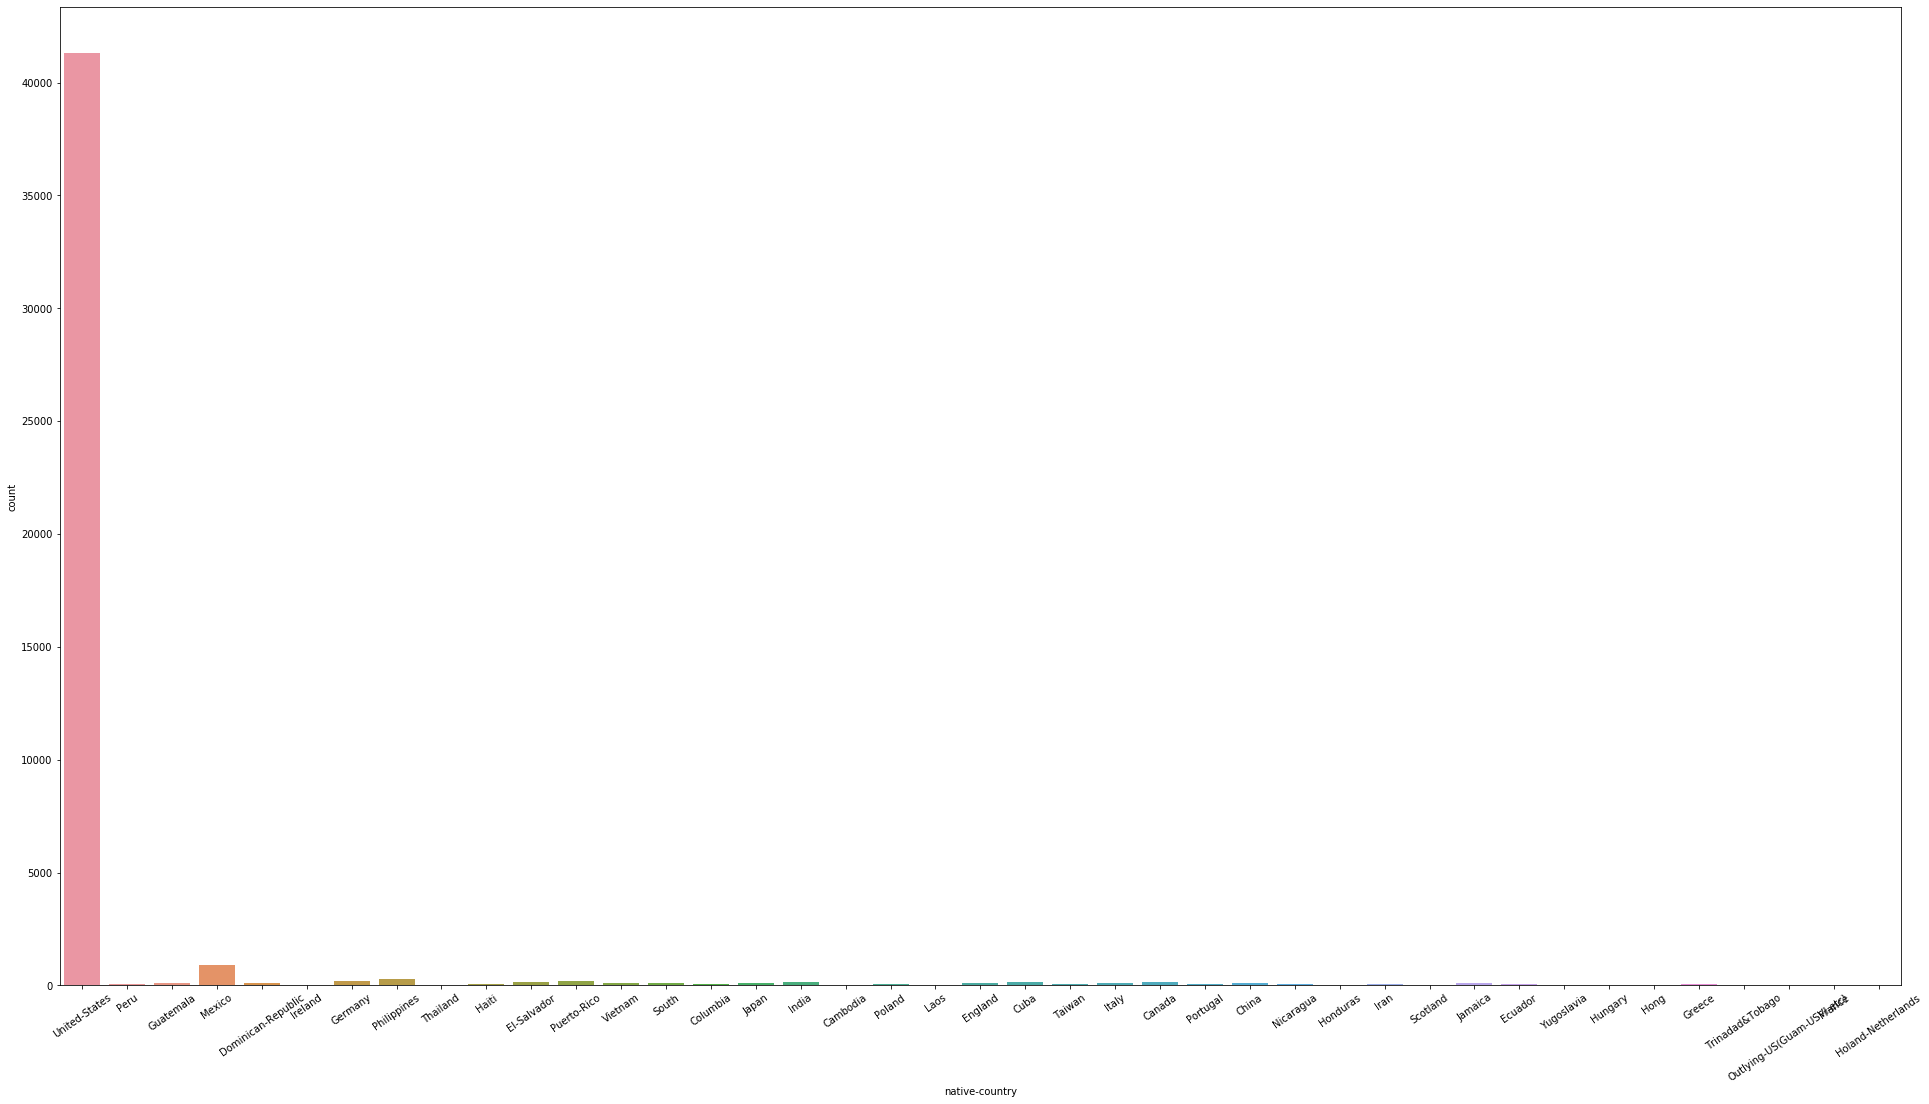

In [131]:
plt.figure(figsize = (33, 18))
sns.countplot(Dat_fr['native-country'])
plt.xticks(rotation = 35)

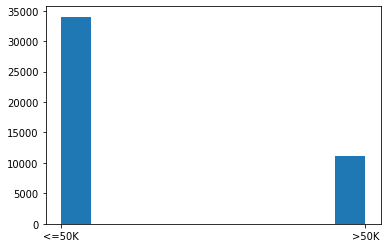

In [132]:
plt.hist(Dat_fr['income'])
plt.show()

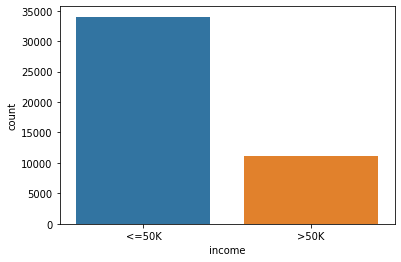

In [134]:
sns.countplot(Dat_fr['income'])

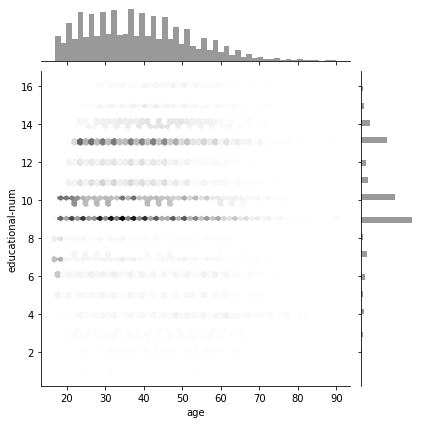

In [135]:
sns.jointplot(x = 'age', y = 'educational-num', data = Dat_fr, kind = 'hex', color = 'k')


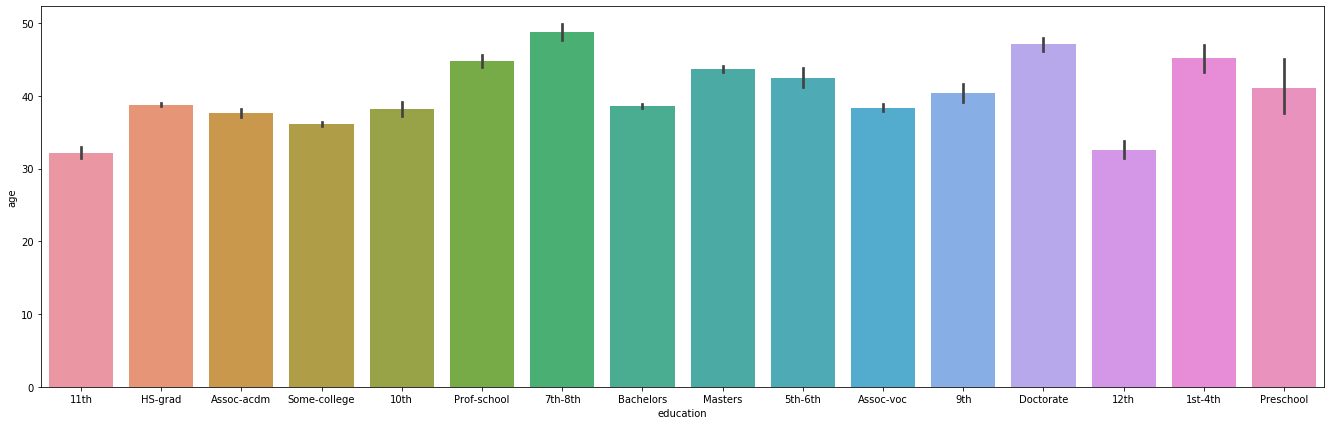

In [136]:
plt.figure(figsize = (23, 7))
sns.barplot(x = 'education', y = 'age', data = Dat_fr)

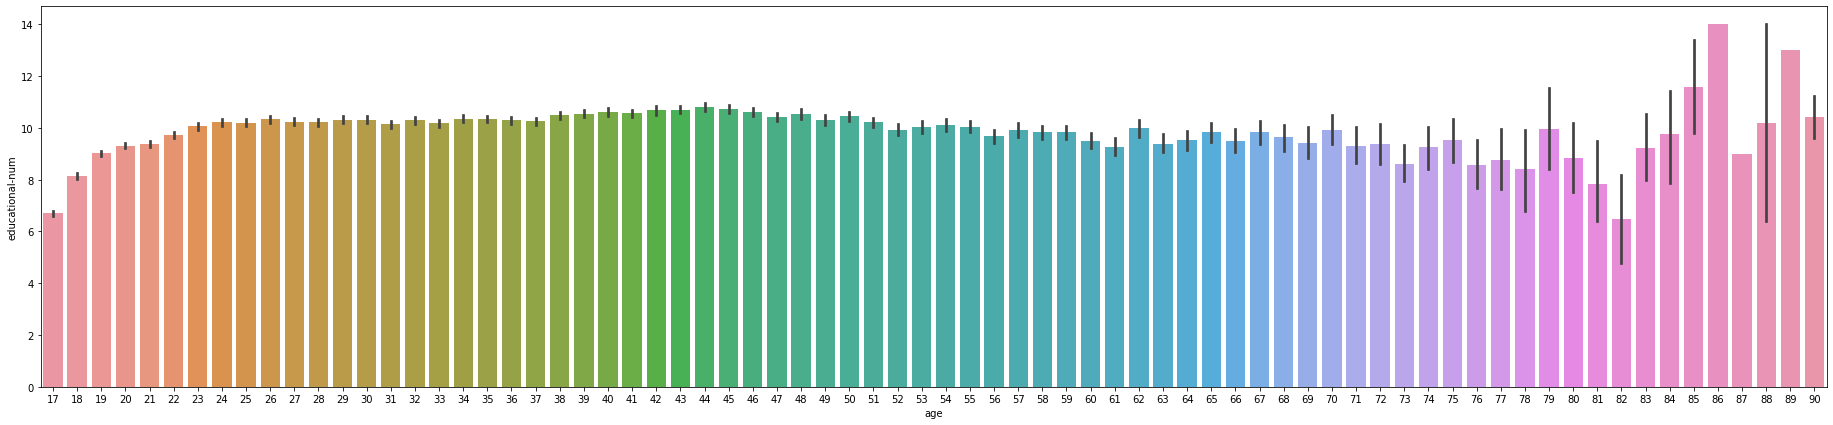

In [137]:
plt.figure(figsize = (32, 7))
sns.barplot(x = 'age', y = 'educational-num', data = Dat_fr)

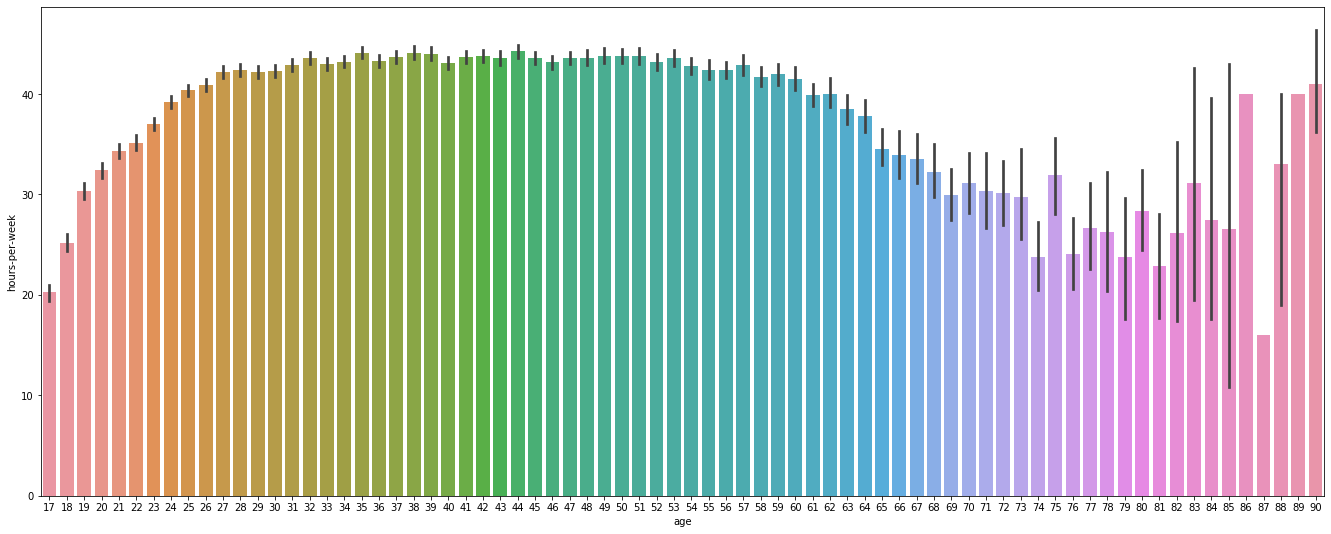

In [138]:
plt.figure(figsize = (23, 9))
sns.barplot(x = 'age', y = 'hours-per-week', data = Dat_fr)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

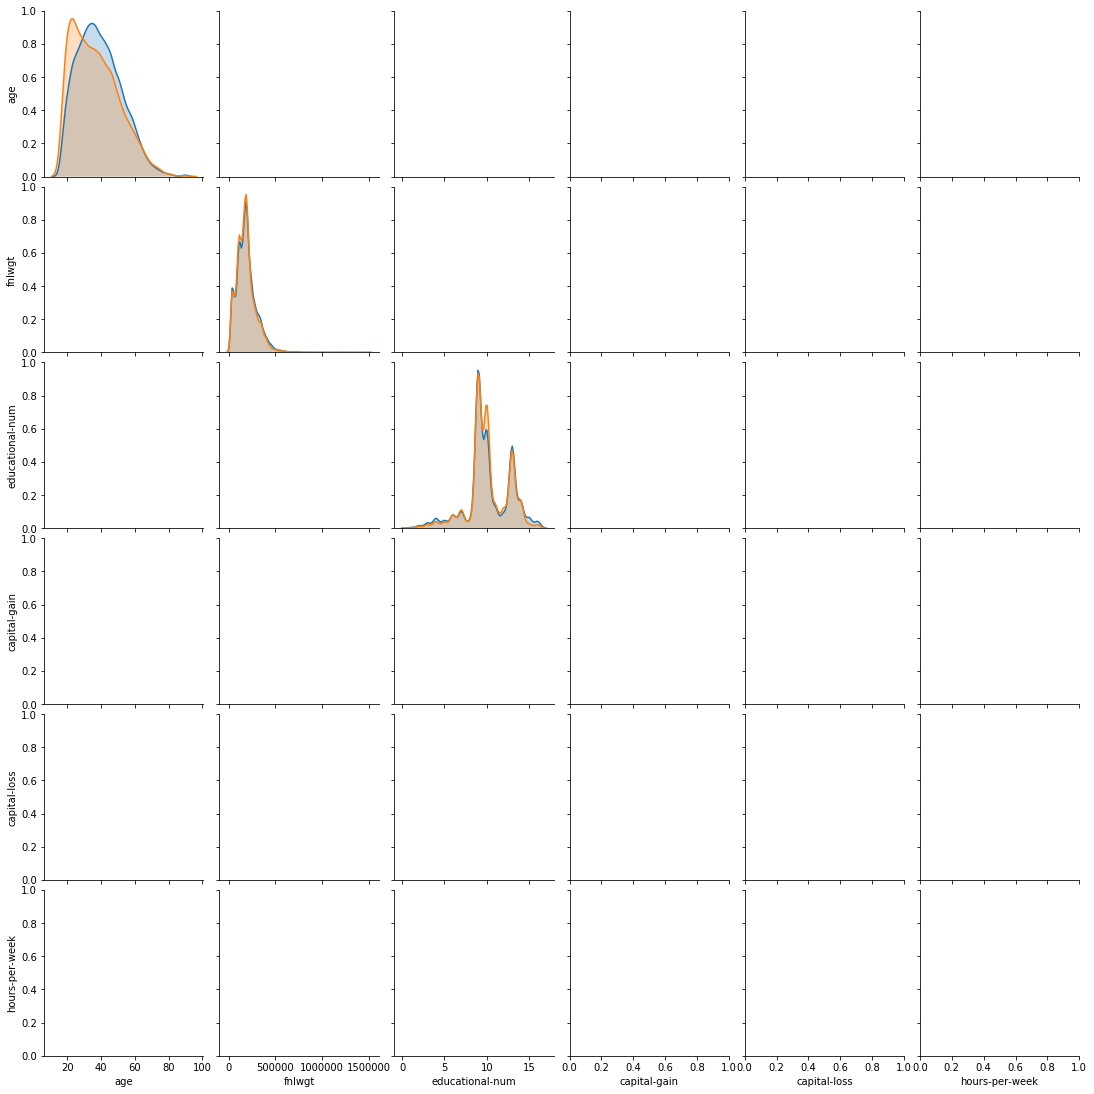

In [139]:
sns.pairplot(Dat_fr, hue = 'gender')

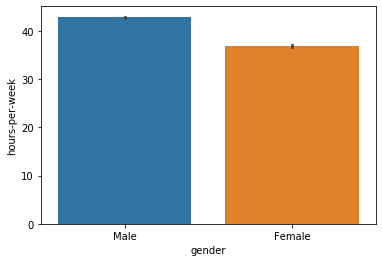

In [140]:
sns.barplot(x = 'gender', y = 'hours-per-week', data = Dat_fr)

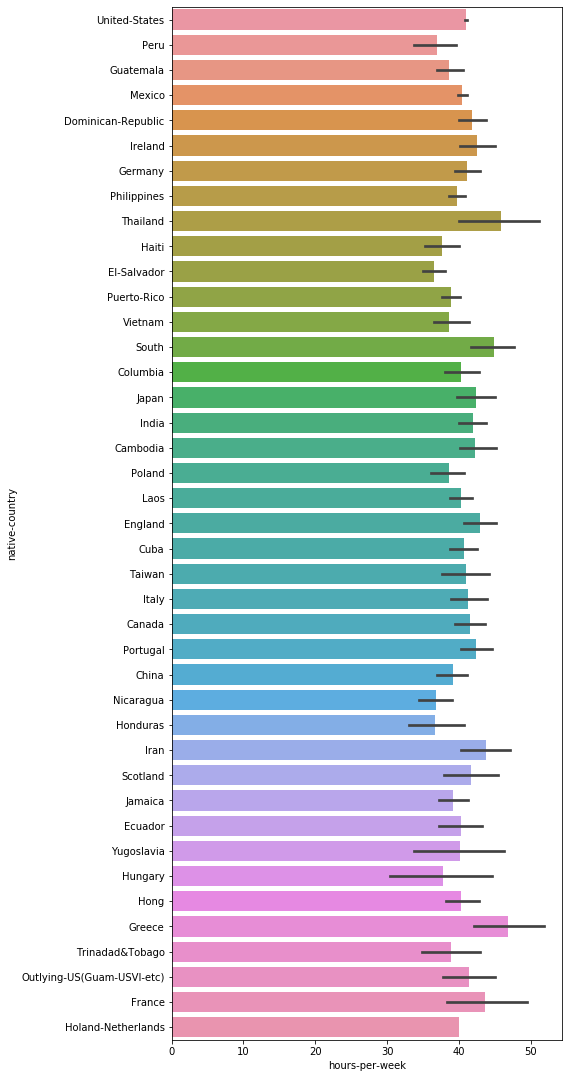

In [153]:
plt.figure(figsize = (7, 19))
sns.barplot(x = 'hours-per-week', y = 'native-country', data = Dat_fr)

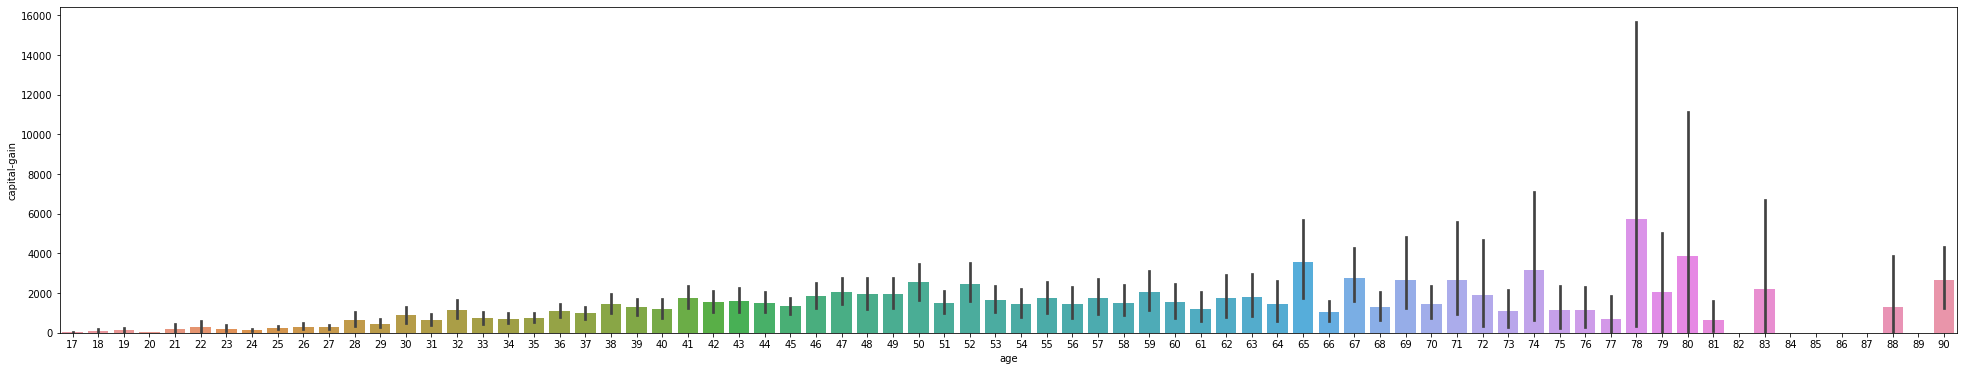

In [151]:
plt.figure(figsize = (34, 6))
sns.barplot(x = 'age', y = 'capital-gain', data = Dat_fr)

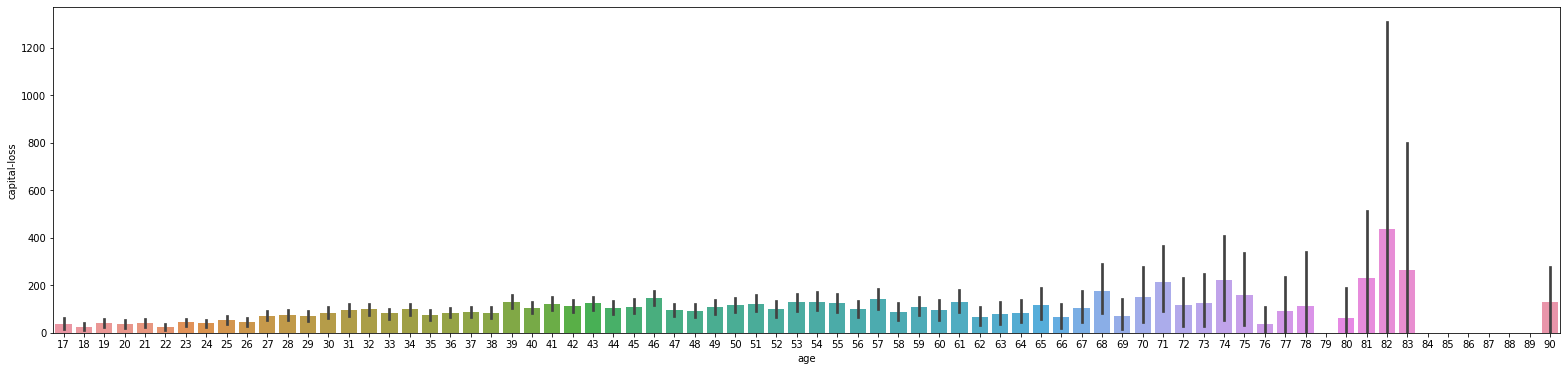

In [150]:
plt.figure(figsize = (27, 6))
sns.barplot(x = 'age', y = 'capital-loss', data = Dat_fr)

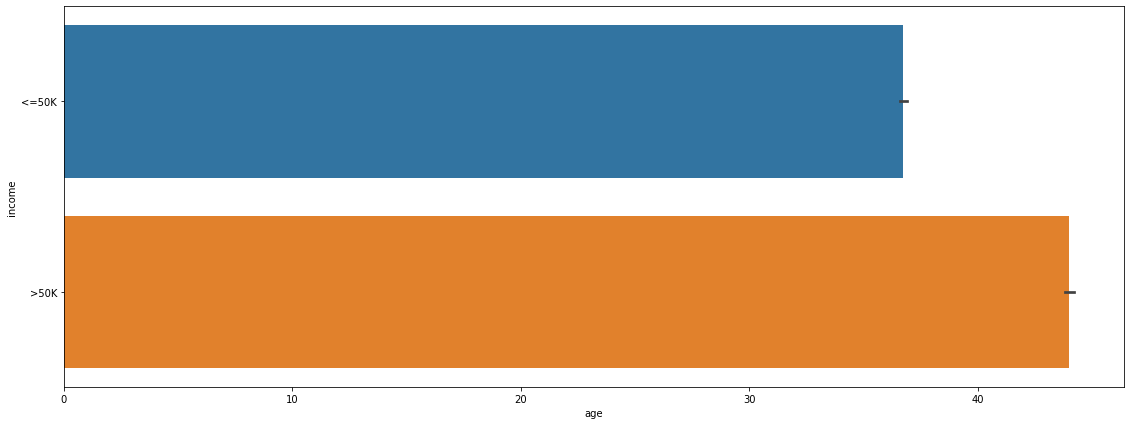

In [149]:
plt.figure(figsize = (19, 7))
sns.barplot(x = 'age', y = 'income', data = Dat_fr)

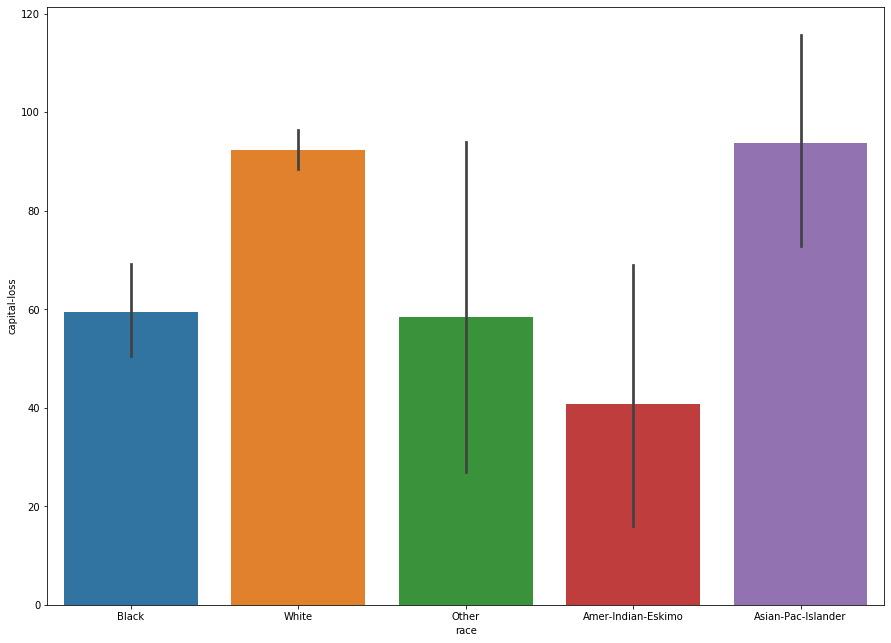

In [148]:
plt.figure(figsize = (15, 11))
sns.barplot(x = 'race', y = 'capital-loss', data = Dat_fr)

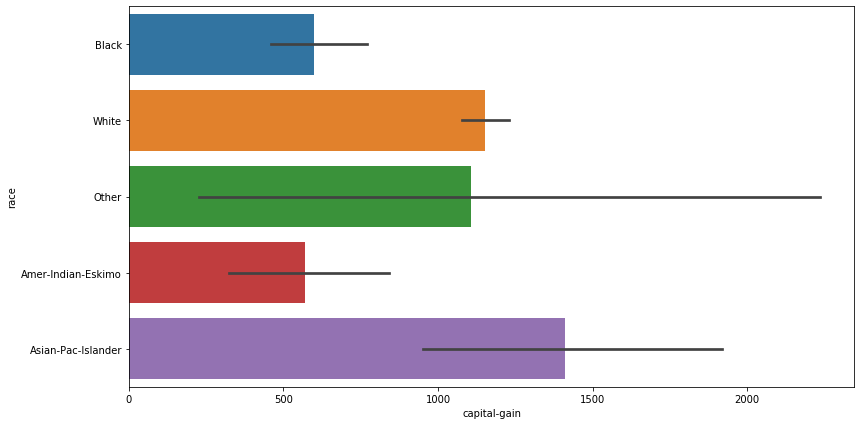

In [147]:
plt.figure(figsize = (13, 7))
sns.barplot(x = 'capital-gain', y = 'race', data = Dat_fr)